In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.decomposition import PCA
import tensorflow as tf

pd.options.display.max_columns = None

In [6]:
df_covid = pd.read_csv('./Covid_clean.csv')

C:\Users\ismael\AppData\Local\Temp\ipykernel_30584\3510291388.py:1: DtypeWarning: Columns (4,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid = pd.read_csv('./Covid_clean.csv')


Contenido del Dataset


The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.
- fallecidos: 1 for yes and 2 for no.

In [13]:
features = ['SEX', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
target = 'fallecidos'

In [14]:
clase_mayoritaria = df_covid[df_covid['fallecidos'] == 0]
clase_minoritaria = df_covid[df_covid['fallecidos'] == 1]

clase_mayoritarial_downsampled = resample(clase_mayoritaria,
                                            replace = False,
                                            n_samples = len(clase_minoritaria),
                                            random_state = 42)

df_covid_downsampled = pd.concat([clase_mayoritarial_downsampled, clase_minoritaria])

df_covid_downsampled['fallecidos'].value_counts()

fallecidos
0    74612
1    74612
Name: count, dtype: int64

# PCA

Varianza explicada por cada componente principal: [0.16067856 0.09755242]


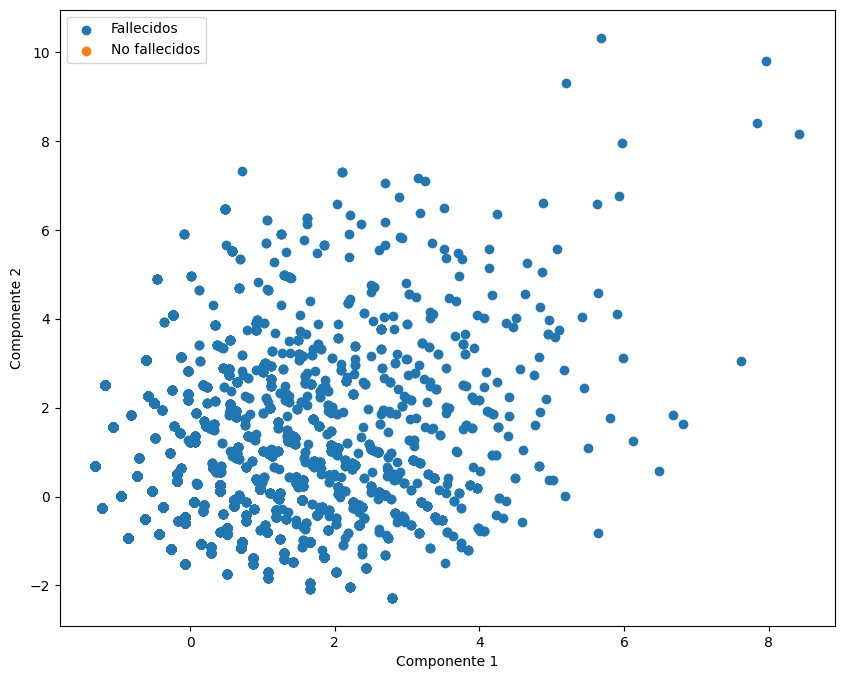

In [15]:
# Separar las variables de características de la variable objetivo
X = df_covid_downsampled[features]
y = df_covid_downsampled[target]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)  # Número de componentes principales a seleccionar
X_pca = pca.fit_transform(X_scaled)

# Visualizar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print('Varianza explicada por cada componente principal:', explained_variance)

# Crear un nuevo dataframe con los componentes principales y la variable objetivo
df_pca = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['fallecidos'] = y

# Visualizar los datos en el espacio de los componentes principales


plt.figure(figsize=(10, 8))
plt.scatter(df_pca.loc[df_pca['fallecidos'] == 1, 'Componente 1'], df_pca.loc[df_pca['fallecidos'] == 1, 'Componente 2'], label='Fallecidos')
plt.scatter(df_pca.loc[df_pca['fallecidos'] == 2, 'Componente 1'], df_pca.loc[df_pca['fallecidos'] == 2, 'Componente 2'], label='No fallecidos')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

In [17]:
df_pca.head()
# unique en la columna fallecidos
df_pca['fallecidos'].unique()


array([ 1., nan,  0.])